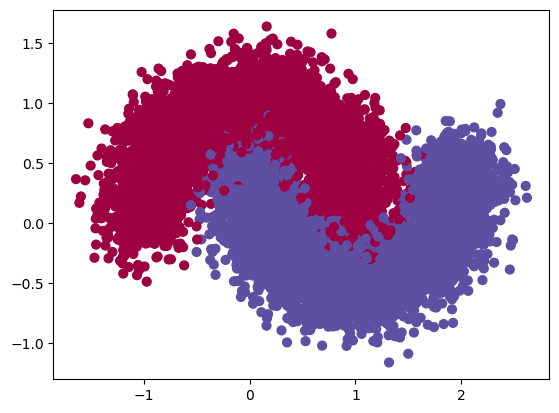

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

train_X, train_Y = sklearn.datasets.make_moons(n_samples=10000, noise=.2) #300 #0.2
test_X, test_Y = sklearn.datasets.make_moons(n_samples=1000, noise=.2)
# Visualize the data
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);


In [7]:
import keras
from keras import layers
from keras.optimizers import Adam

# Define the model
model = keras.Sequential([
    layers.Input(shape=(2,)),  # Input layer
    layers.Dense(5, activation='relu'),  
    layers.Dense(2, activation='relu'),   
    layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [8]:
# Entrenar el modelo
batch_size = 1
epochs = 2
historia = model.fit(
    train_X, train_Y,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(test_X, test_Y))

Epoch 1/2


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.7808 - loss: 0.4626 - val_accuracy: 0.8670 - val_loss: 0.3314
Epoch 2/2
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.8796 - loss: 0.2982 - val_accuracy: 0.8770 - val_loss: 0.2905


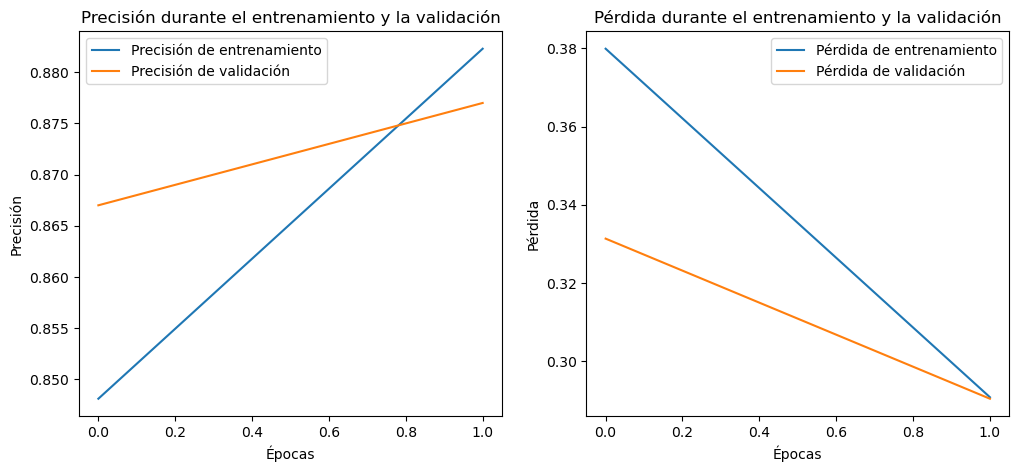

In [9]:
# Graficar las curvas de entrenamiento
plt.figure(figsize=(12, 5))

# Gráfica de la precisión
plt.subplot(1, 2, 1)
plt.plot(historia.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(historia.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfica de la pérdida
plt.subplot(1, 2, 2)
plt.plot(historia.history['loss'], label='Pérdida de entrenamiento')
plt.plot(historia.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()